<a href="https://colab.research.google.com/github/ydv1412/airbnb_EDA/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b> Airbnb Inc. is an American Company that operates an online marketplace for lodging primarily homestays for vacation rentals, and tourism activities.Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Here we have airbnb dataset consisting of about 49000 rows and 16 columns. Let's analyse this dataset and see if this data contains any hidden dependency which can benifit Airbnb in scaling, decision making, increasing customers'(guest) and producers'(host) understanding or increasing profit. 


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

import plotly.express as px

In [32]:
!pip3 install geopandas

     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 16.7 MB 331 kB/s 
     |████████████████████████████████| 6.3 MB 41.8 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/capstone project /airbnb/Airbnb NYC 2019.csv",encoding= 'utf-8')  ## reading file

In [4]:

print("the shape of dataset is {} ".format(df.shape))

the shape of dataset is (48895, 16) 


This dataset contains 48895 rows and 16 columns.
Let's see what columns we have..

In [5]:
columns  = df.columns
print(columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


* ***Let's see what type of data these columns contains..***

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We have one datetime,five string objects and rest contains numerical values.. 

 ***Let's have a look at dataset***

In [7]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


* ***Let's see how many unique neighbourhood_groups do we have..***

In [8]:
no_of_unique_destinations = len(df["neighbourhood_group"].unique())                ## no. of unique destination
unique_destinations = df["neighbourhood_group"].unique()                           ## unique destinations
print("We have {} unique destinations".format(no_of_unique_destinations))
print(unique_destinations)

We have 5 unique destinations
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


* ***Let's see how many visits per neighbourhood_group do we have..***

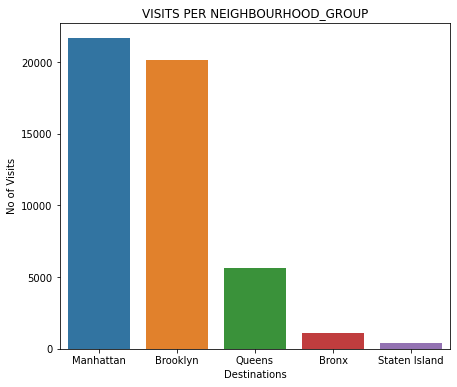

In [9]:
df_2 = df.groupby(by = "neighbourhood_group")['neighbourhood'].count().reset_index(name = "count").sort_values(by = "count" , ascending = False) ## grouping by neighbourhood_group


plt.figure(figsize = (7,6))               ## setting figure size

sns.barplot(x = df_2["neighbourhood_group"] , y = df_2["count"])     ## barpot

plt.xlabel("Destinations")
plt.ylabel("No of Visits")
plt.title("VISITS PER NEIGHBOURHOOD_GROUP")
plt.show()

Manhattan is the most visited neighbourhood_group followed by Brooklyn.Queens Destination is the third most visited neighbourhood_group.

***Let's see number of unique neighbourhood..***

In [10]:
print("We have {} unique neighbourhood".format(len(df['neighbourhood'].unique())))

We have 221 unique neighbourhood


* ***Let's see visits per neighbourhood..***


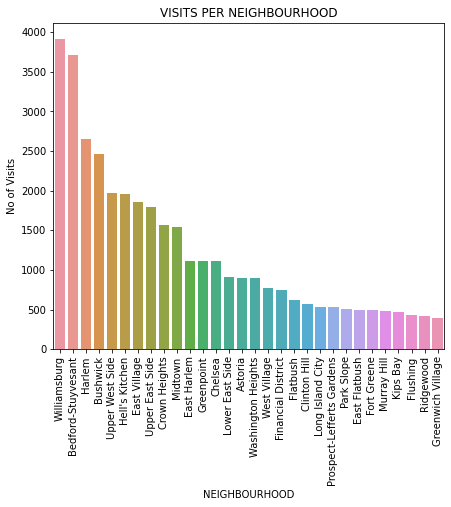

In [11]:
top_30_neighbours_guest_wise = df.groupby(by = "neighbourhood").size().reset_index(name = "count").sort_values(by = "count" , ascending = False).iloc[:30]  ### getting top 30 busiest neighbourhood

plt.figure(figsize = (7,6))               ## setting figure size

sns.barplot(x = top_30_neighbours_guest_wise["neighbourhood"] , y = top_30_neighbours_guest_wise["count"])     ## barpot

plt.xlabel("NEIGHBOURHOOD")
plt.ylabel("No of Visits")
plt.title("VISITS PER NEIGHBOURHOOD")
plt.xticks(rotation = 90) 
plt.show()

* ***Let's see top 10 and bottom 10 neighbourhood with respect to the number of hosts they have side by side..***

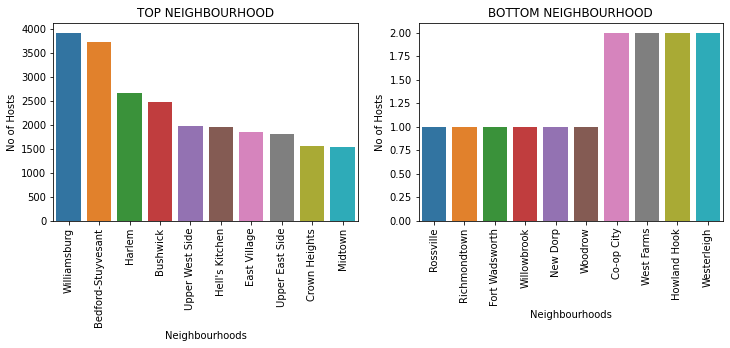

In [12]:
df_3_max = df.groupby(by = "neighbourhood" , as_index = False)["host_id"].count().sort_values(by = "host_id" , ascending= False).iloc[:10]  ## top 10 neighbourhoods
df_3_min = df.groupby(by = "neighbourhood" , as_index = False)["host_id"].count().sort_values(by = "host_id" , ascending= True).iloc[:10]   ## bottom 10 neighbourhoods

plt.figure(figsize = (12,8))
plt.subplot(221)                                                              ## first subplot
sns.barplot(x = df_3_max["neighbourhood"] , y = df_3_max["host_id"])
plt.xticks(rotation = 90)
plt.xlabel("Neighbourhoods")
plt.ylabel("No of Hosts")
plt.title("TOP NEIGHBOURHOOD")


plt.subplot(222)                                                             ## second subplot
sns.barplot(x = df_3_min["neighbourhood"] , y = df_3_min["host_id"])
plt.xlabel("Neighbourhoods")
plt.ylabel("No of Hosts")
plt.title("BOTTOM NEIGHBOURHOOD")
plt.xticks(rotation = 90)                                                    ## rotating xticks by 90 degrees


plt.show()

* ***Let's see which 5 hosts who have attended max number of guests..***

In [13]:
top_5_hosts = df.groupby(["host_id"]).size().reset_index(name = 'count').sort_values(by = "count" , ascending = False).iloc[:5]   ## creating a data frame
print(top_5_hosts)

         host_id  count
34646  219517861    327
29407  107434423    232
19574   30283594    121
31079  137358866    103
14436   16098958     96


* ***Now let's see to which neighbourhoods these host id belongs to along with the average number of reviews they get from users, room_type and price..***

In [14]:
top_5_hosts["neighbourhood"] = top_5_hosts["host_id"].apply(lambda x: df[df["host_id"] == x]["neighbourhood"].unique())   ## taking corresponding neighbourhood values from df dataframe
top_5_hosts["avg_no_of_reviews"] = top_5_hosts["host_id"].apply(lambda x: df[df["host_id"] == x]["number_of_reviews"].mean())  ## taking corresponding mean of reviews from df dataframe
top_5_hosts["neighbourhood_group"] = top_5_hosts["host_id"].apply(lambda x: df[df["host_id"] == x]["neighbourhood_group"].unique())   ## taking corresponding neighbourhood_group values from df dataframe
top_5_hosts["room_type"] = top_5_hosts["host_id"].apply(lambda x: df[df["host_id"] == x]["room_type"].unique())        ## taking corresponding room_type values from df dataframe
top_5_hosts["price"] = top_5_hosts["host_id"].apply(lambda x: df[df["host_id"] == x]["price"].mean())                  ## taking corresponding price mean values from df dataframe

In [15]:
top_5_hosts

,host_id,count,neighbourhood,avg_no_of_reviews,neighbourhood_group,room_type,price
34646,219517861,327,"[Financial District, Murray Hill, Hell's Kitch...",3.917431,[Manhattan],"[Entire home/apt, Private room]",253.195719
29407,107434423,232,"[Kips Bay, Financial District, Murray Hill, Tr...",0.125000,"[Manhattan, Brooklyn]",[Entire home/apt],303.150862
19574,30283594,121,"[Financial District, Theater District, Midtown...",0.537190,[Manhattan],[Entire home/apt],277.528926
31079,137358866,103,"[Harlem, East Harlem, Sunnyside, Jackson Heigh...",0.844660,"[Manhattan, Queens, Brooklyn]","[Private room, Entire home/apt]",43.825243
14436,16098958,96,"[Upper East Side, Gramercy, Upper West Side, H...",1.437500,[Manhattan],"[Entire home/apt, Private room]",208.958333


These top 5 hosts belong to Manhattan , Queens ,Brooklyn neighbourhood_group(mostly Manhattan) .

***Let's find intersection between neighbourhood_groups of these busiest hosts and the most busest top_30_neighbourhoods that we calculated avobe to see if there is any data link***

In [16]:
### Finding intection length between these neighbourhood_groups and top neighbourhood_groups from top_30_neighbourhood dataset

all_dests = set(top_5_hosts["neighbourhood"].explode())    #### finding the neighbourhoods of these busiest hosts
length_1 = len(set(top_30_neighbours_guest_wise["neighbourhood"]).intersection(all_dests))
print("intersection length is {}".format(length_1))     

intersection length is 17




> As we can see that 17 out of 30 neighbourhood_groups belong to Manhattan , Queens ,Brooklyn neighbouhood.These hosts are busiest because they are mostly in or around Manhattan and Manhattan has maximum number of guests as seen above
>.Also these hosts are busiest because most of them are situated in busiest neighbourhoods.


 

* ***Now let's see what different room-types do hosts have***

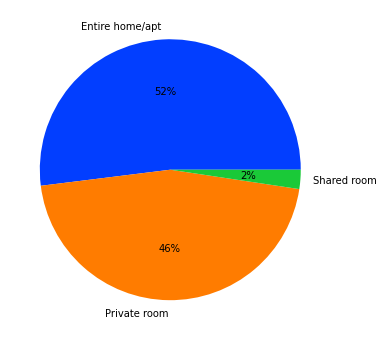

In [17]:
df_4 = df.groupby(by = "room_type" ,as_index = False)["id"].count()

plt.figure(figsize = (6,6))
colors = sns.color_palette('bright')[0:5]   ## setting colour list
plt.pie(df_4["id"], labels = df_4["room_type"], colors = colors, autopct='%.0f%%' )             #### plotting pie
plt.show()   

***Let's see mean price as per different room_types***

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

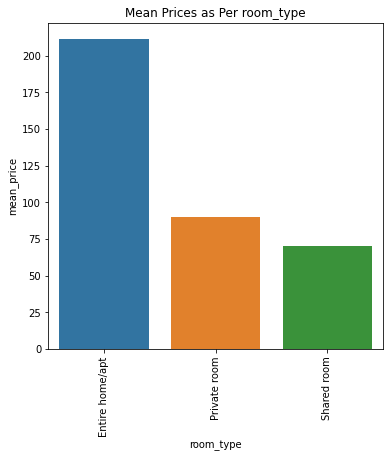

In [67]:
df_5 = df.groupby(by = "room_type" ,as_index = False)["price"].mean()

plt.figure(figsize = (6,6))
sns.barplot(x = df_5["room_type"] , y = df_5["price"])
plt.xlabel("room_type")
plt.ylabel("mean_price")
plt.title("Mean Prices as Per room_type")
plt.xticks(rotation = 90)   

* ***Now let's analyse price column***

In [18]:
df["price"].describe()      ### seeing min ,max and avg pricing throughout dataset

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

We have mean_price,min_price and max_price 152, 0, 10000 respectively.We should remove rows which are having 0 price beause it must be some data error.

***Let's see how many rows having 0 pricing***

In [19]:
zero_pricing = df[df['price']==0].index        ## indexes where price is zero
print("dataset have {} rows where price is zero".format(len(zero_pricing)))

dataset have 11 rows where price is zero


Let's have a look at these rows

In [20]:
df[df['price']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,NaN,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


In [21]:
df.drop(zero_pricing,inplace =True)   ### dropping rows

* ***Lets see how pricing varies with neighbourhood group***

In [22]:
df.groupby(by = "neighbourhood_group")["price"].describe()   ### first griouping by neighbourhood_group then applying describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1090.0,87.577064,106.725371,10.0,45.0,65.0,99.0,2500.0
Brooklyn,20095.0,124.438915,186.896837,10.0,60.0,90.0,150.0,10000.0
Manhattan,21660.0,196.884903,291.386838,10.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.517649,167.102155,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


We can see that manhattan is the costliest neighbourhood with a mean price of 220 and Bronx is the cheapest with a mean price of 99

We can also see that there is huge difference between 75% and max price. Let's restrict our dataset to 99% for price and observe the distribution of data from 0 to 99 percentile through violin plot.

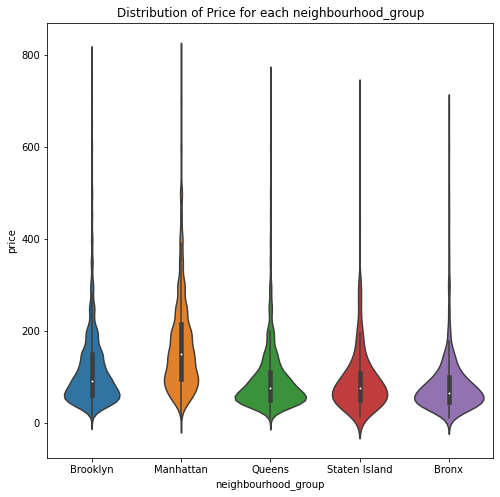

In [23]:
plt.figure(figsize = (8,8))
sns.violinplot( data = df[df["price"]<df["price"].quantile(0.99)] , x = "neighbourhood_group" , y = "price")    ### restricting our violinplot to 99 percentile of price
plt.title("Distribution of Price for each neighbourhood_group")

plt.show()

***Let's plot boxplot for the same***

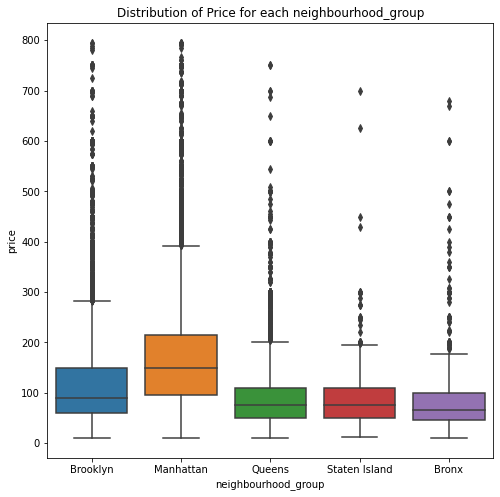

In [24]:
plt.figure(figsize = (8,8))
sns.boxplot( data = df[df["price"]<df["price"].quantile(0.99)] , x = "neighbourhood_group" , y = "price")    ### restricting our violinplot to 99 percentile of price
plt.title("Distribution of Price for each neighbourhood_group")

plt.show()

We can see that we have very few data points in Queens,Staten_ Island,Bronx neighburhood as prices reaches there max.These could be outliers. 

***Now lets analyse neighbourhood and price column together to see if there is any relation***

* ***Now let's see top 10 neighbourhood with highest mean price***

In [25]:
df.groupby(by = "neighbourhood")["price"].mean().reset_index(name = "mean_price").sort_values(by ="mean_price" , ascending = False).iloc[:10]

,neighbourhood,mean_price
82,Fort Wadsworth,800.000000
219,Woodrow,700.000000
197,Tribeca,490.638418
174,Sea Gate,487.857143
167,Riverdale,442.090909
157,Prince's Bay,409.500000
6,Battery Park City,367.557143
75,Flatiron District,341.925000
161,Randall Manor,336.000000
144,NoHo,295.717949


In [26]:
df.groupby(by = "neighbourhood")["price"].mean().reset_index(name = "mean_price").sort_values(by ="mean_price" , ascending = True).iloc[:10]

,neighbourhood,mean_price
27,Bull's Head,47.333333
102,Hunts Point,50.500000
196,Tremont,51.545455
179,Soundview,53.466667
141,New Dorp,57.000000
24,Bronxdale,57.105263
142,New Dorp Beach,57.400000
88,Grant City,57.666667
46,Concord,58.192308
135,Mount Eden,58.500000


Fort Wadsworth is the costliest neighbourhood with a mean_price of 800 whereas Bull's Head is the cheapest with a mean_price of 47.

* ***Now let's see mean pricese for each room_type we have..***

In [27]:
df.groupby(by = "room_type")["price"].mean().reset_index(name = "mean_price").sort_values(by ="mean_price" , ascending = False)

,room_type,mean_price
0,Entire home/apt,211.810918
1,Private room,89.809131
2,Shared room,70.248705


Entire home/apt is the costliest room_type with a mean_price of 211 whereas Shared room is the cheapest with a mean_price of 70.

* ***Let's see if there is any coorelation between pricing and number_of_reviews or pricing and reviews_per_month***


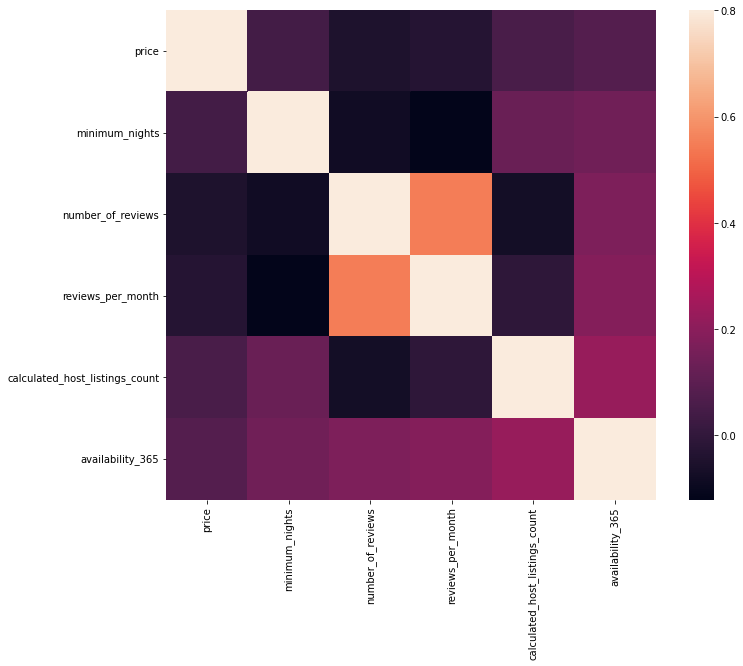

In [28]:
### picking numerical columns except longitudes and latitudes

columns = ["price"	,"minimum_nights"	,"number_of_reviews","reviews_per_month"	,"calculated_host_listings_count",	"availability_365"]  

corrmat = df[columns].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Above Heat map suggest that the numerical columns of our dataset have negligibe coorelation between them mean they are almost independent of each other.

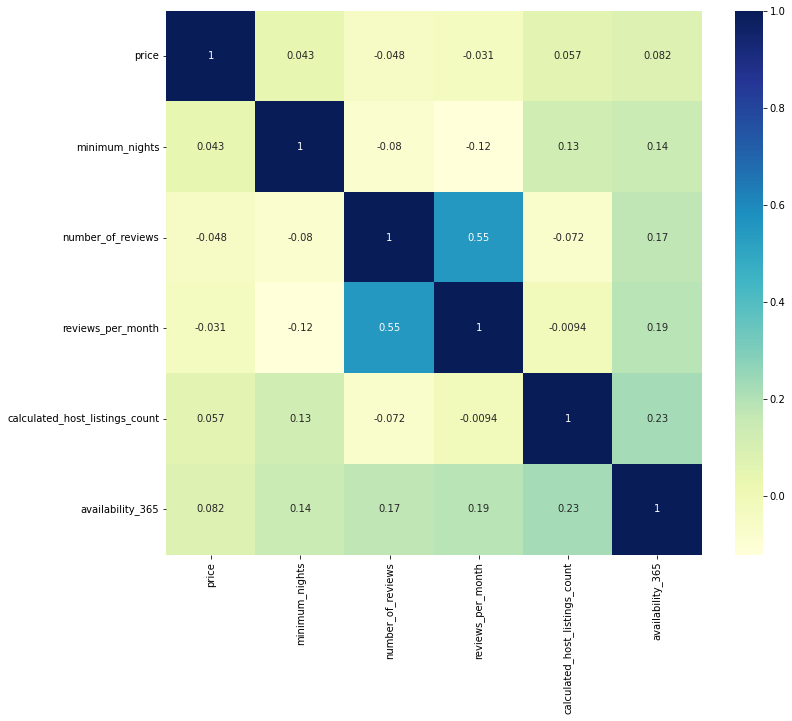

In [29]:
plt.figure(figsize = (12,10))
dataplot = sns.heatmap(df[columns].corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

* ***Lets see how price varies along with latitude and longitude***

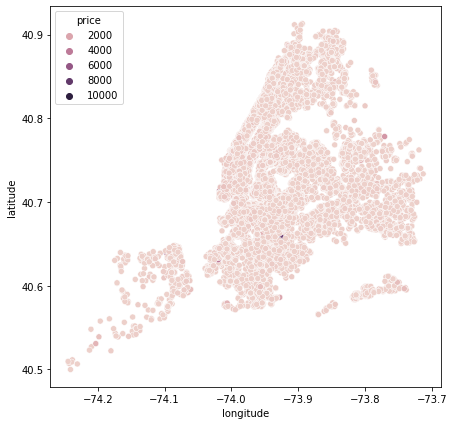

In [30]:
plt.figure(figsize = (7,7))
colormap = matplotlib. colors. ListedColormap(colors)
sns.scatterplot(x = df["longitude"] , y = df["latitude"] , hue = df["price"] , cmap =colormap)
plt.show()

We have very few dark points in this plot these could be outliers

Now we are done with analysing. We are not analysing columns like name , minimum_nights, number_of_reviews,last_review,
       reviews_per_month, calculated_host_listings_count,
       availability_365 because they are not seemingly important in our case. 

# NOW LET'S DEAL WITH MISSING VALUES

*** Let's see how many null values each column have in nour dataset***

In [34]:
df.isnull().sum()      ### number of null values per column

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10051
reviews_per_month                 10051
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We can see that name,host_name,last_review , reviews_per_month are four columns that contain null values.There is a say that you should drop a column if has more than 15% of null values. reviews_per_month and last_review contains same number of null values.We are going to find percentage of null values if it exceeds 15% we will drop both columns

In [35]:
null_per = (df["last_review"].isnull().sum()*100)/df["last_review"].isnull().count()      ### calculating null percentage
print("Both contains {}% null values".format(null_per))

Both contains 20.56091972833647% null values


 reviews_per_month and last_review contains 20.55 percent of null values.We should drop them but lets see there coorelation in dataframe for one last time before dropping

In [36]:
df.corr(method = 'pearson')

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588316,-0.003115,0.090895,0.010639,-0.013229,-0.319800,0.291862,0.133275,0.085468
host_id,0.588316,1.000000,0.020199,0.127022,0.015294,-0.017391,-0.140181,0.296395,0.154949,0.203434
latitude,-0.003115,0.020199,1.000000,0.084830,0.033899,0.024893,-0.015357,-0.010117,0.019518,-0.010942
longitude,0.090895,0.127022,0.084830,1.000000,-0.149954,-0.062772,0.059015,0.145888,-0.114715,0.082669
price,0.010639,0.015294,0.033899,-0.149954,1.000000,0.042805,-0.047926,-0.030575,0.057462,0.081847
minimum_nights,-0.013229,-0.017391,0.024893,-0.062772,0.042805,1.000000,-0.080080,-0.121644,0.127962,0.144275
number_of_reviews,-0.319800,-0.140181,-0.015357,0.059015,-0.047926,-0.080080,1.000000,0.549763,-0.072385,0.171975
reviews_per_month,0.291862,0.296395,-0.010117,0.145888,-0.030575,-0.121644,0.549763,1.000000,-0.009431,0.185730
calculated_host_listings_count,0.133275,0.154949,0.019518,-0.114715,0.057462,0.127962,-0.072385,-0.009431,1.000000,0.225712
availability_365,0.085468,0.203434,-0.010942,0.082669,0.081847,0.144275,0.171975,0.185730,0.225712,1.000000


We can't see any strong correlation so we are going to drop both columns.


In [37]:
df.drop(columns = ["last_review" , "reviews_per_month"] , inplace = True)        ### dropping columns last_review  and reviews_per_month

Now come to host_name and name columns.They contain 21 and 16 null values.These numbers are not large if we delete these rows we will not loose much any data.So are going to drop particular rows for which they contain null values.

In [38]:
df_1 = df.drop(df.loc[df["host_name"].isnull()].index)    ### deleting particular rows
df_1 = df_1.drop(df_1.loc[df["name"].isnull()].index)

print(df_1.isnull().any())         ### checking one last time

id                                False
name                              False
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool


 # NOW LETS REMOVE OUTLIERS

There are three columns for which we are going to check for any outlier
price,longitude , latitude. Before going for outliers lets first standardise our columns.

In [39]:
df_1["price"] = ( df_1["price"] - df_1["price"].mean() )/( df_1["price"].max() - df_1["price"].min() )       ## standerdisation = (x - x.mean)/(x.max() - x.min())

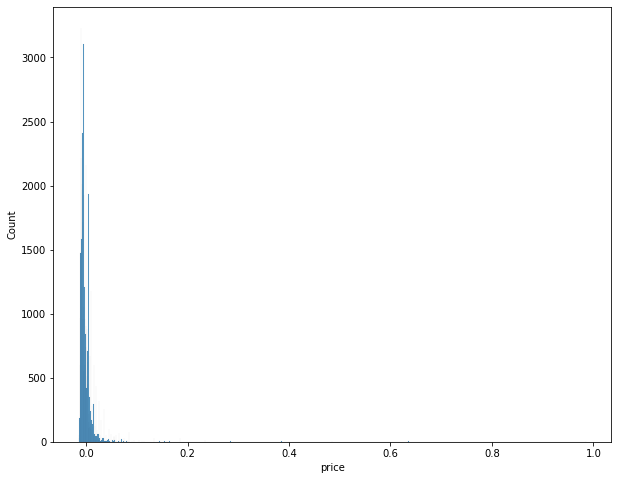

In [40]:
plt.figure(figsize= (10,8))
sns.histplot( x = df_1["price"])  ### plotting histplot


We can see that out plot is positively skewed.Lets see boxplot

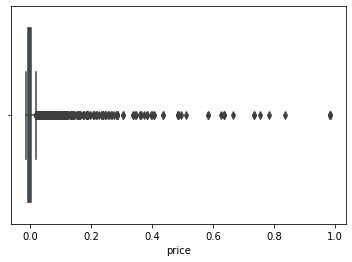

In [41]:
sns.boxplot( x = df_1["price"])      ## boxplot

From the plot we can see that on the extreme right of out plot there are very few points.We will remove these points.

***Let's see price distribution for each neighbourhood_type*** 

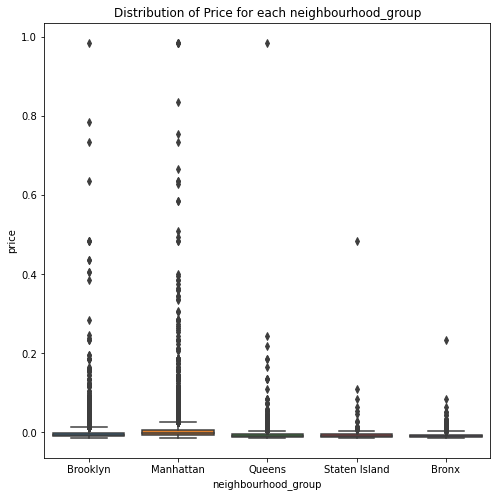

In [42]:
plt.figure(figsize = (8,8))
sns.boxplot( data = df_1 , x = "neighbourhood_group" , y = "price")   
plt.title("Distribution of Price for each neighbourhood_group")

plt.show()

***Let's remove outliers using IQR(Inter Quantile Range)***

In [43]:
unique_neighbourhood_group = df_1['neighbourhood_group'].unique()

In [44]:
final_df = pd.DataFrame([],columns = df_1.columns)   # creating a new dataset

In [45]:
for n_g in unique_neighbourhood_group:                   ## iterating through neighbourhood_groups
  new_df = df_1[df_1['neighbourhood_group'] == n_g]
  Q1 = new_df['price'].quantile(0.25)                     ## first quantile
  Q3 = new_df['price'].quantile(0.75)                     ## third quantile
  IQR = Q3 - Q1
  new_df2 = new_df[(new_df['price'] >= Q1 - 1.5 * IQR ) & (new_df['price'] <= Q3 + 1.5 * IQR)]    ## filtering dataset
  objects = [final_df , new_df2]
  final_df = pd.concat(objects , ignore_index = True)                   #concatinating datasets

After remove outliers let's visualise our final_df

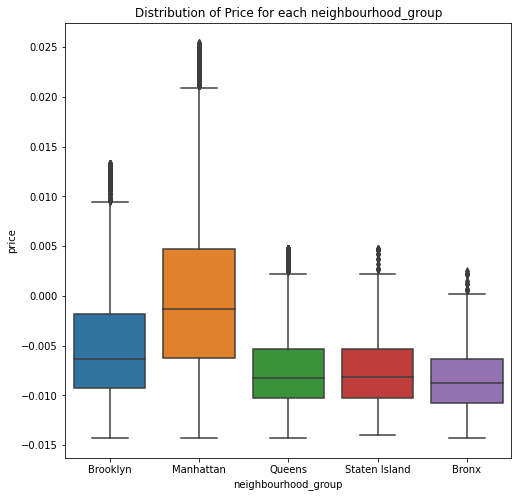

In [46]:
plt.figure(figsize = (8,8))
sns.boxplot( data = final_df , x = "neighbourhood_group" , y = "price")   
plt.title("Distribution of Price for each neighbourhood_group")

plt.show()

Now it's looking nice.Let's now have a quick look at scatterplot of longitude and latitude columns.

Let's plot these values on world map

In [63]:
street_map = gpd.read_file("/content/drive/MyDrive/nyc 2010 Neighborhood Tabulation Areas (NTAs)/geo_export_0d39f412-fa4f-45cf-a9dc-04a10de3e14f.shp")   ## loading nyc neighbourhood shape files

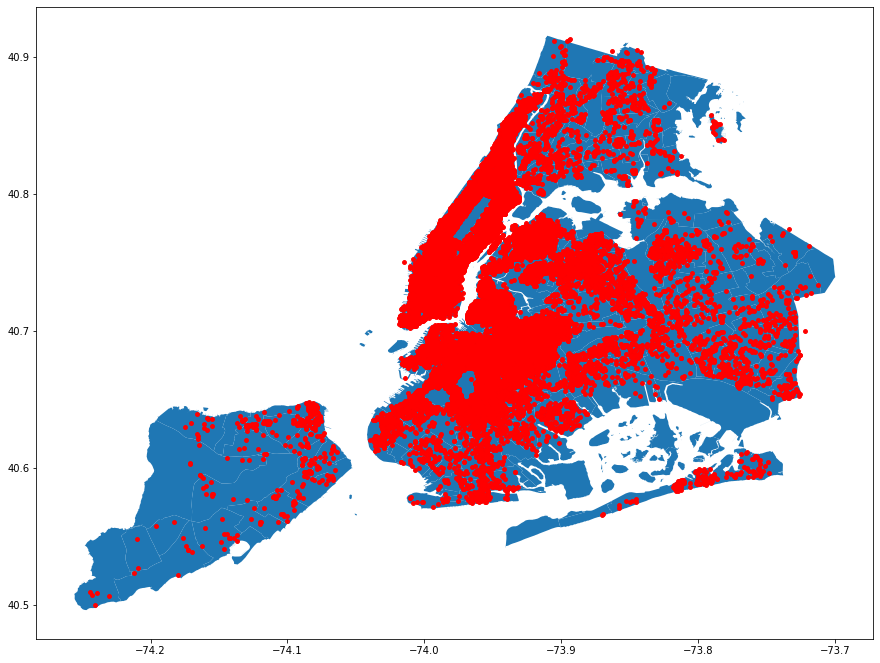

In [64]:
geometry = [Point(xy) for xy in zip(final_df['longitude'], final_df['latitude'])]    ### creating geometry points
gdf = GeoDataFrame(final_df, geometry=geometry) 
fig , ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax) 
gdf.plot(ax=ax, marker='o', color='red', markersize=15);                          ## plotting neighbourhood

In this plot we can see that we don't have any extreme points.So will not remove any data points.

We are done now , let's move to the final conclusions.

***CONCLUSION***
* We have five neighbourhood_groups Brooklyn,Manhattan,Queens,Staten Island and Bronx in which Manhattan is most visited and Staten Island is least visited.
* We have 221 unique neighbourhoods in which Williamsberg,Bedford-Stuyvesant,Harlem are the top visited neighbourhoods whereas Rossville,Richmondtown,Fort-Wadsworth are least visited neighbourhoods.
* We have three room types Entire_home/apt, shared room and Private room with constitution of 52% ,2% and 46% respectively.
* Our min ,mean and max price of whole dataset is 0, 152 and 10000 respectively.
* Manhattan is the most costliest neighbourhood_group with a mean price of 220 and Bronx is the cheapest neighbourhood with mean price of 99.
* Fort Wadsworth is the costliest neighbourhood with a mean price of 800 and Bull's Head is cheapest with a mean price of 47.
* Entire home/apt room type are costly with a mean price of 211 and shared room are cheapest with a mean price of 70.
* From heat map we came to a conclusion that this dataset does not shows any correlation.Price is not affected by any numerical valued coulmn.Price is mostly affected by neighbourhood_group if a host is situaited in Manhattan ,Brooklyn or Queens its price will be high.